In [4]:
from collections import Counter, defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
project_path = Path("/projects/b1171/ylk4626/project/Chimera")

# TODO 

- [x] check chimeric rate for p2 and mk1c
- [ ] construct traning set by chimeric read


| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 dirty | 12963576 | 28027667  | 0.46 |  
| P2 clean |  233740  | 10065403  | 0.023  | 
| mk1c dirty | 1666427 |7193945  | 0.23 | 
| mk1c clean | 28748 |1140363  | 0.025  | 

## MK1C dirty
The number of sequences: 7193945
The minimum length of sequences: 3
The maximum length of sequences: 42118
The mean length of sequences: 1469.25
The standard deviation of sequences: 1148.43
The first quartile of sequences: 760
The second quartile of sequences: 1143
The third quartile of sequences: 1766

## MK1C clean 
The number of sequences: 1140363
The minimum length of sequences: 4
The maximum length of sequences: 239720
The mean length of sequences: 6852.38
The standard deviation of sequences: 10041.85
The first quartile of sequences: 2021
The second quartile of sequences: 3526
The third quartile of sequences: 6793

## P2 dirty
The number of sequences: 28027667
The minimum length of sequences: 1
The maximum length of sequences: 126974
The mean length of sequences: 2488.00
The standard deviation of sequences: 2056.88
The first quartile of sequences: 1139
The second quartile of sequences: 1864
The third quartile of sequences: 3153

## P2 clean
The number of sequences: 10065403
The minimum length of sequences: 0
The maximum length of sequences: 387657
The mean length of sequences: 7024.89
The standard deviation of sequences: 8518.80
The first quartile of sequences: 2593
The second quartile of sequences: 3550
The third quartile of sequences: 7657


[2025-06-20T02:33:31Z INFO  annotate] "data/raw/PC3_bulk_WGS_P2_clean.bam" collect 233740 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 233740 chimeric events to "data/raw/PC3_bulk_WGS_P2_clean.chimeric_events.txt"
[2025-06-20T02:33:32Z INFO  annotate] "data/raw/PC3_bulk_WGS_Pacbio_clean.bam" collect 114430 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 114430 chimeric events to "data/raw/PC3_bulk_WGS_Pacbio_clean.chimeric_events.txt"
[2025-06-20T02:33:32Z INFO  annotate] "data/raw/PC3_bulk_WGS_Mk1c_clean.bam" collect 28748 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 28748 chimeric events to "data/raw/PC3_bulk_WGS_Mk1c_clean.chimeric_events.txt"
[2025-06-20T02:35:03Z INFO  annotate] "data/raw/PC3_10_cells_MDA_P2_dirty.bam" collect 12963576 chimeric events
[2025-06-20T02:35:15Z INFO  annotate] write 12963576 chimeric events to "data/raw/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt"


In [82]:
(7193945 - 1666427)  * 0.025

138187.95

In [84]:
def read_sup(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            result[content[0]] = int(content[1])
    return result

In [97]:
sup_threshold_1000 = read_sup(project_path / "data/raw/PC3_10_cells_MDA_P2_dirty.threshold_1000.sup.txt")

In [98]:
sup_threshold_1000

{'68145a05-b7ee-4344-823a-d0d4998b6be4': 0,
 'bb21acd4-3187-47f7-8fee-8cb361ae2a1b': 0,
 '8d1a56a0-e60f-4909-8517-e293e4fcd17b': 0,
 '917b7243-8d22-410e-8b92-3a6c68ed7a33_1': 0,
 'c381fa56-7c68-4216-a411-eb405747550a': 0,
 '44ea3488-c90c-4023-8cc4-7c631c0297d9': 0,
 '5e4d3e9e-d5fd-481e-8e19-8863689e5ee5': 0,
 '6c0d9a0a-4323-4e70-8939-677b0fcc3be6': 0,
 '2334694d-2ba6-4d09-b873-e69601628c9c': 0,
 '77a0f686-44ba-43ef-b2f1-d0ff2239ee9c': 0,
 '4a62acc5-970c-4219-bd79-c99716d6c75c': 0,
 '71fc2188-984e-4f0b-94ba-0a6bb672eeca': 0,
 '3e67dc99-32bc-47d5-ba6d-b400d62fcd0f': 0,
 '80d28ed3-e6c4-47a4-bd10-949c845899c6': 0,
 '0545c227-ced9-45d6-b473-14243ac8b217': 0,
 '7c5efab4-4ba7-4217-b6ae-031ae0ffce82_2': 0,
 '918e972a-8611-499c-a123-a35f4169bfdf': 0,
 '005e8257-0e0c-410c-9d15-737c3c807864': 0,
 'f4209899-f4bf-4570-8411-2c1acc370c07': 0,
 'ccd7cfd0-3f77-428c-a56e-82a0ec8943b4': 0,
 'e7da2f28-42a0-4873-a31e-051c5b0c5abe_1': 0,
 'f0d6dbac-b396-4d40-adda-1a3a4aeab808': 0,
 'c00ac3dd-b34f-438b-bc1f-

In [99]:
from collections import Counter

In [100]:
sup_threshold_1000_counter = Counter(sup_threshold_1000.values())

In [101]:
sup_threshold_1000_counter

Counter({0: 12670396, 2: 190309, 1: 101094, 3: 1777})

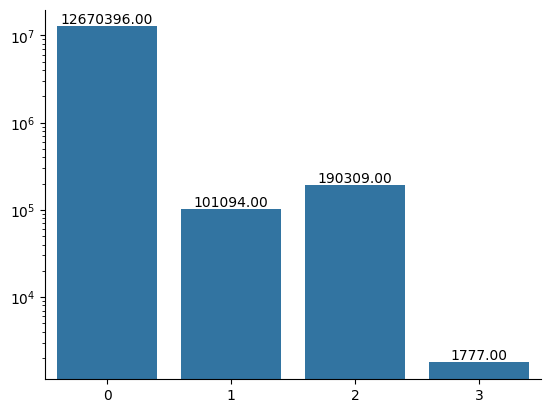

In [102]:
ax = sns.barplot(sup_threshold_1000_counter)
sns.despine()
plt.bar_label(ax.containers[0], fmt="%.2f")
plt.yscale("log")

In [104]:
190309 + 101094 + 1777

293180

In [105]:
293180 * 2 

586360

In [33]:
def read_chimeric_read(path):
    result = set()
    with open(path) as f:
        for line in f:
            result.add(line.strip())
    return result

def read_chmeric_sup(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            if len(content) == 2:
                read_name, sup = content 
                result[read_name] = [int(sup)]
            else:
                read_name, sup, samples = content 
                result[read_name] = [int(sup), samples] 
                
    return result

def read_prediction(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            result[content[0]] = int(content[1])
    return result

In [13]:
mk1c_chimeric_reads = read_chimeric_read(project_path / "data/raw/PC3_10_cells_MDA_Mk1c_dirty.bam.chimeric_reads.txt")

In [34]:
mk1c_chimeric_events = read_chmeric_sup(project_path / "data/raw//PC3_10_cells_MDA_Mk1c_dirty.threshold_1000.sup.txt")

In [14]:
len(mk1c_chimeric_reads)

1666427

In [25]:
len(set(mk1c_chimeric_reads))

1666427

In [58]:
mk1c_chimeric_events

{'2077aad5-2077-42ec-ac64-8b7ff1019457': [0],
 '9bbe1337-a14f-4119-a5e8-51913573d23b': [0],
 'afed05ad-f3ee-4828-848d-96b4b31ef143': [0],
 '303b3760-d788-4d6b-b1d1-c63339cb8230': [0],
 'bc973a4d-47a7-4eb2-bdef-fe302acaa9e1': [0],
 '85985879-fecd-4938-a4b9-cf0befe3a767': [0],
 '1928a08e-8ab3-4849-aa1b-b966f3a3d656': [0],
 'cab96800-9e89-4650-b9cc-121d88bc60bf_1': [0],
 '71d3c43b-d969-4577-9173-00dc02d5943c': [0],
 '65f3b3b0-c490-4cb2-b3be-241d8c6c6b81': [0],
 '0f29c6ae-0633-46c8-a187-889371363a91': [0],
 'e6d08ff0-65da-4165-9291-866bb24116c9': [0],
 'f5e17b24-005e-4921-ac24-c63f4fc92e9a': [0],
 '391c4376-8c99-4028-86b2-0b719d2f0d1d': [0],
 '682b099b-a275-47eb-b54f-8269b5a33f8d': [0],
 '402bc9e9-82e9-437c-bc5f-82d648ed2dd4': [0],
 '9db22f9c-dcaa-495f-ab9b-baf15ddf9272': [1, 'PC3_bulk_WGS_P2_clean.bam'],
 '60af077c-d8b3-4da1-8169-06bfca514628': [0],
 'fb371361-8629-4176-bb3c-a3e375f275d4': [0],
 'ddae8075-fa11-4a11-8f2e-d348a457837a': [0],
 'ec4ecb9e-b85b-4040-a4fc-6dde9ee4cac4': [0],
 '9

In [ ]:
chmamba_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chmambasp_mk1c/predicts.txt")

In [49]:
chhyena_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chhyena_mk1c/predicts.txt")

In [52]:
chcnn_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chcnn_mk1c/predicts.txt")

In [79]:
chcnn_p5_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chcnn_p5_mk1c/predicts.txt")

In [106]:
chcnn_p2_586360_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chcnn_p2_586360_mk1c/predicts.txt")

In [108]:
chhyena_p2_586360_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chhyena_p2_586360_mk1c/predicts.txt")

In [48]:
len(chmamba_mk1c_predictions)

1666427

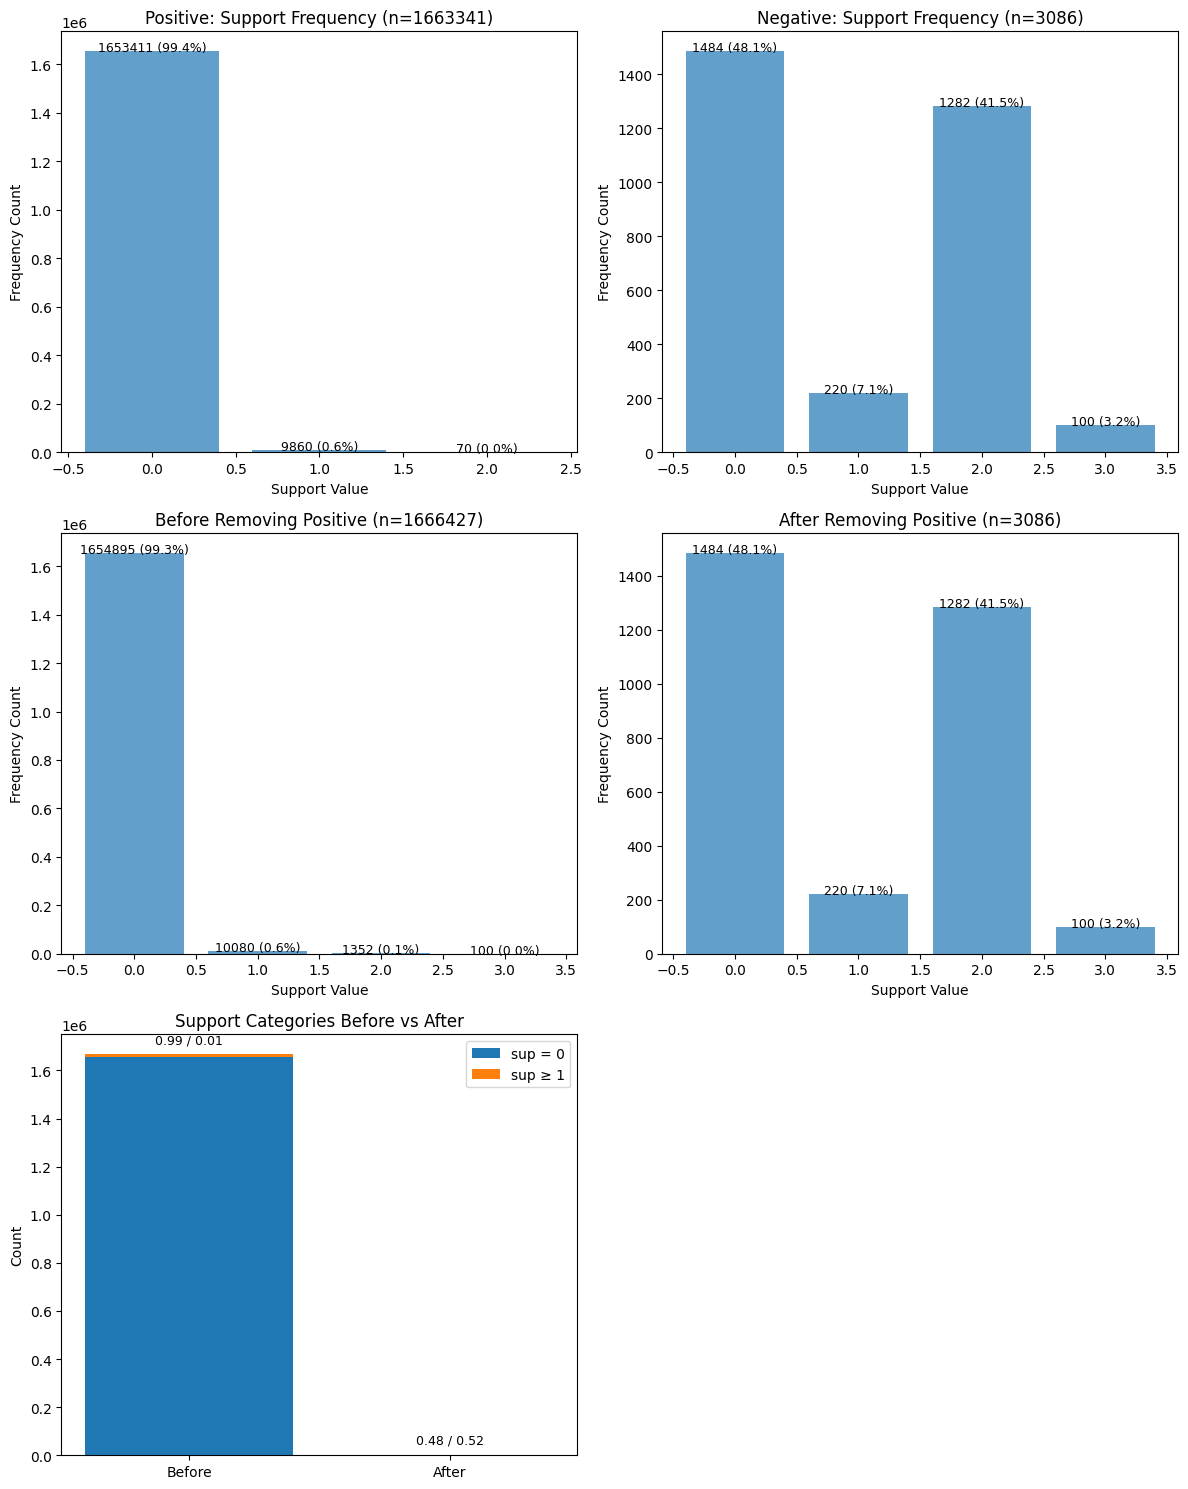

In [75]:
tt = summary_prediction_with_chimeric_sup(chmamba_mk1c_predictions,  mk1c_chimeric_events)

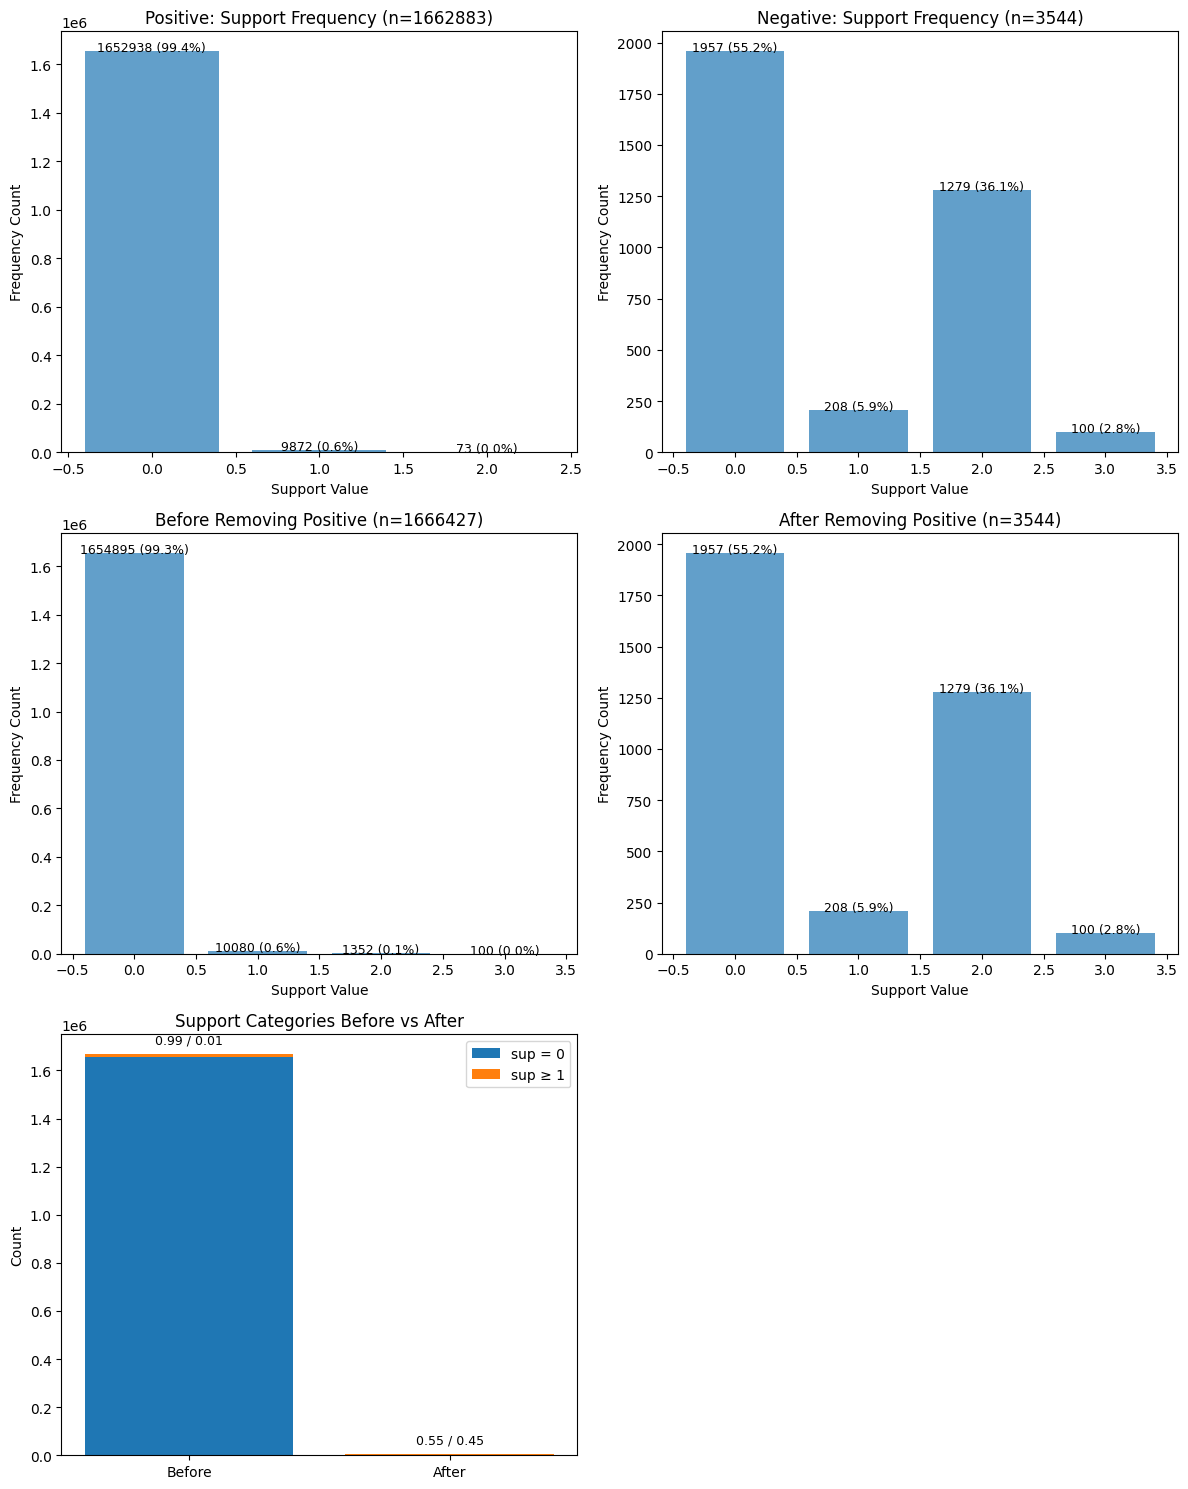

In [76]:
_ = summary_prediction_with_chimeric_sup(chhyena_mk1c_predictions,  mk1c_chimeric_events)

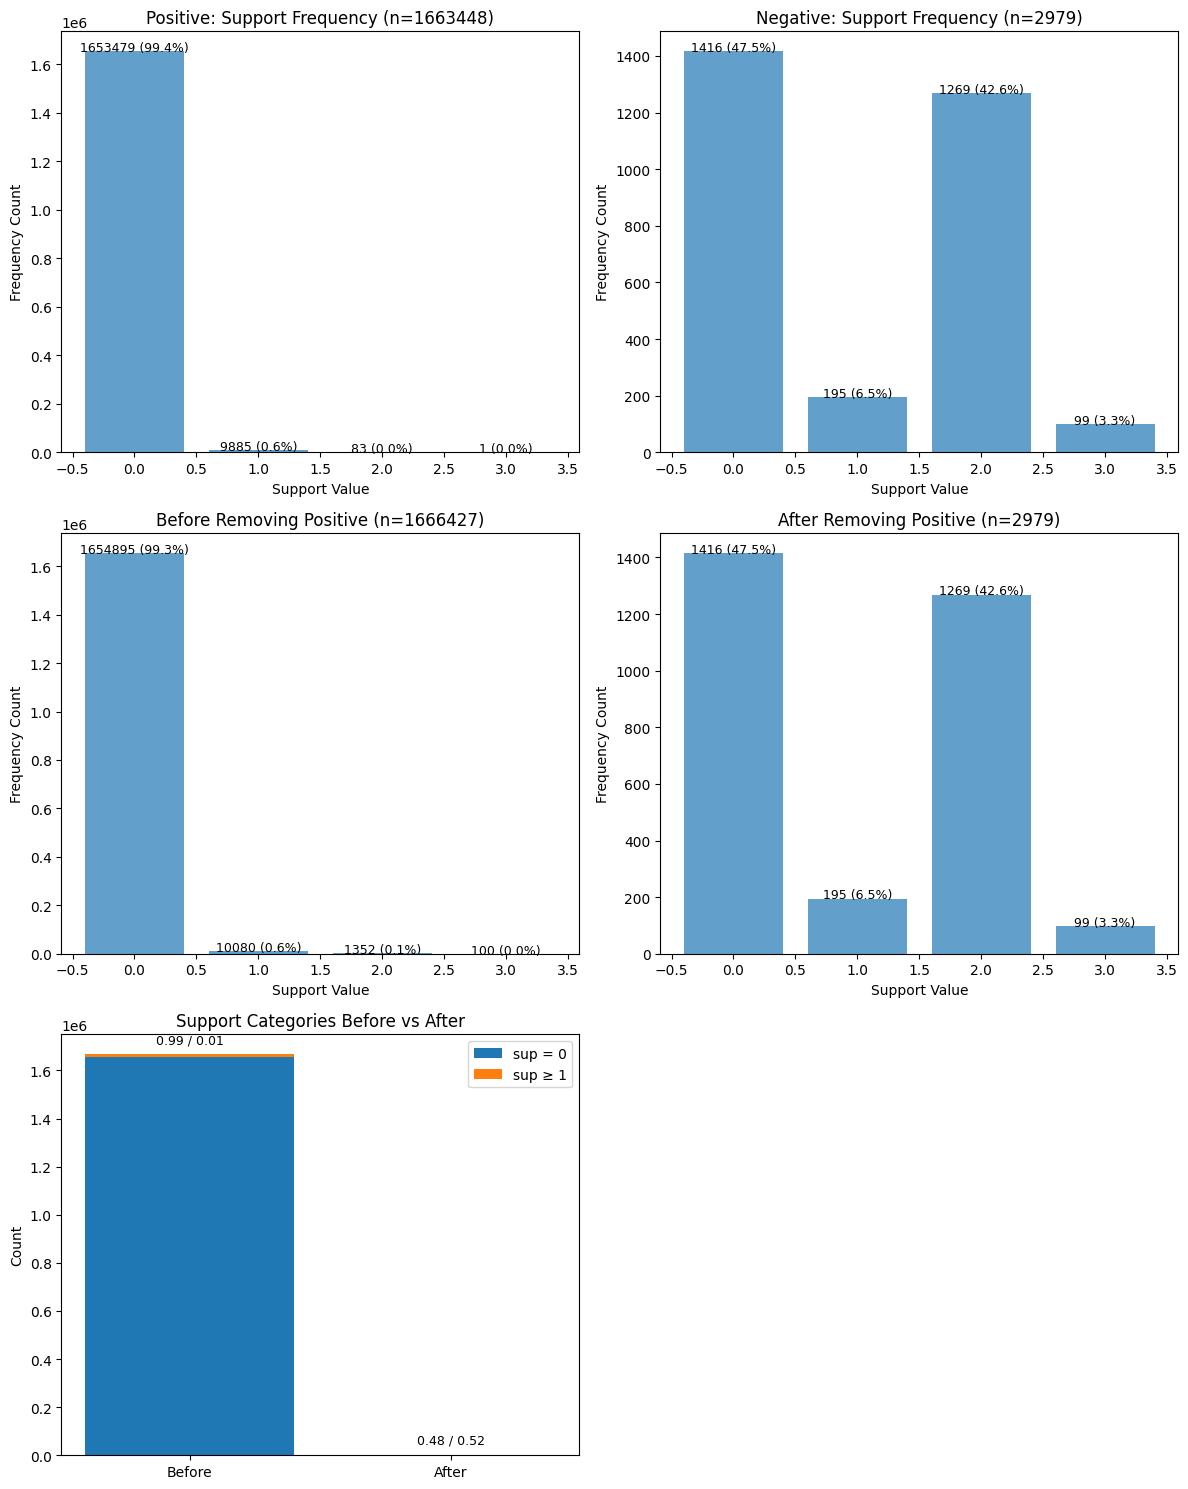

In [77]:
_ = summary_prediction_with_chimeric_sup(chcnn_mk1c_predictions,  mk1c_chimeric_events)

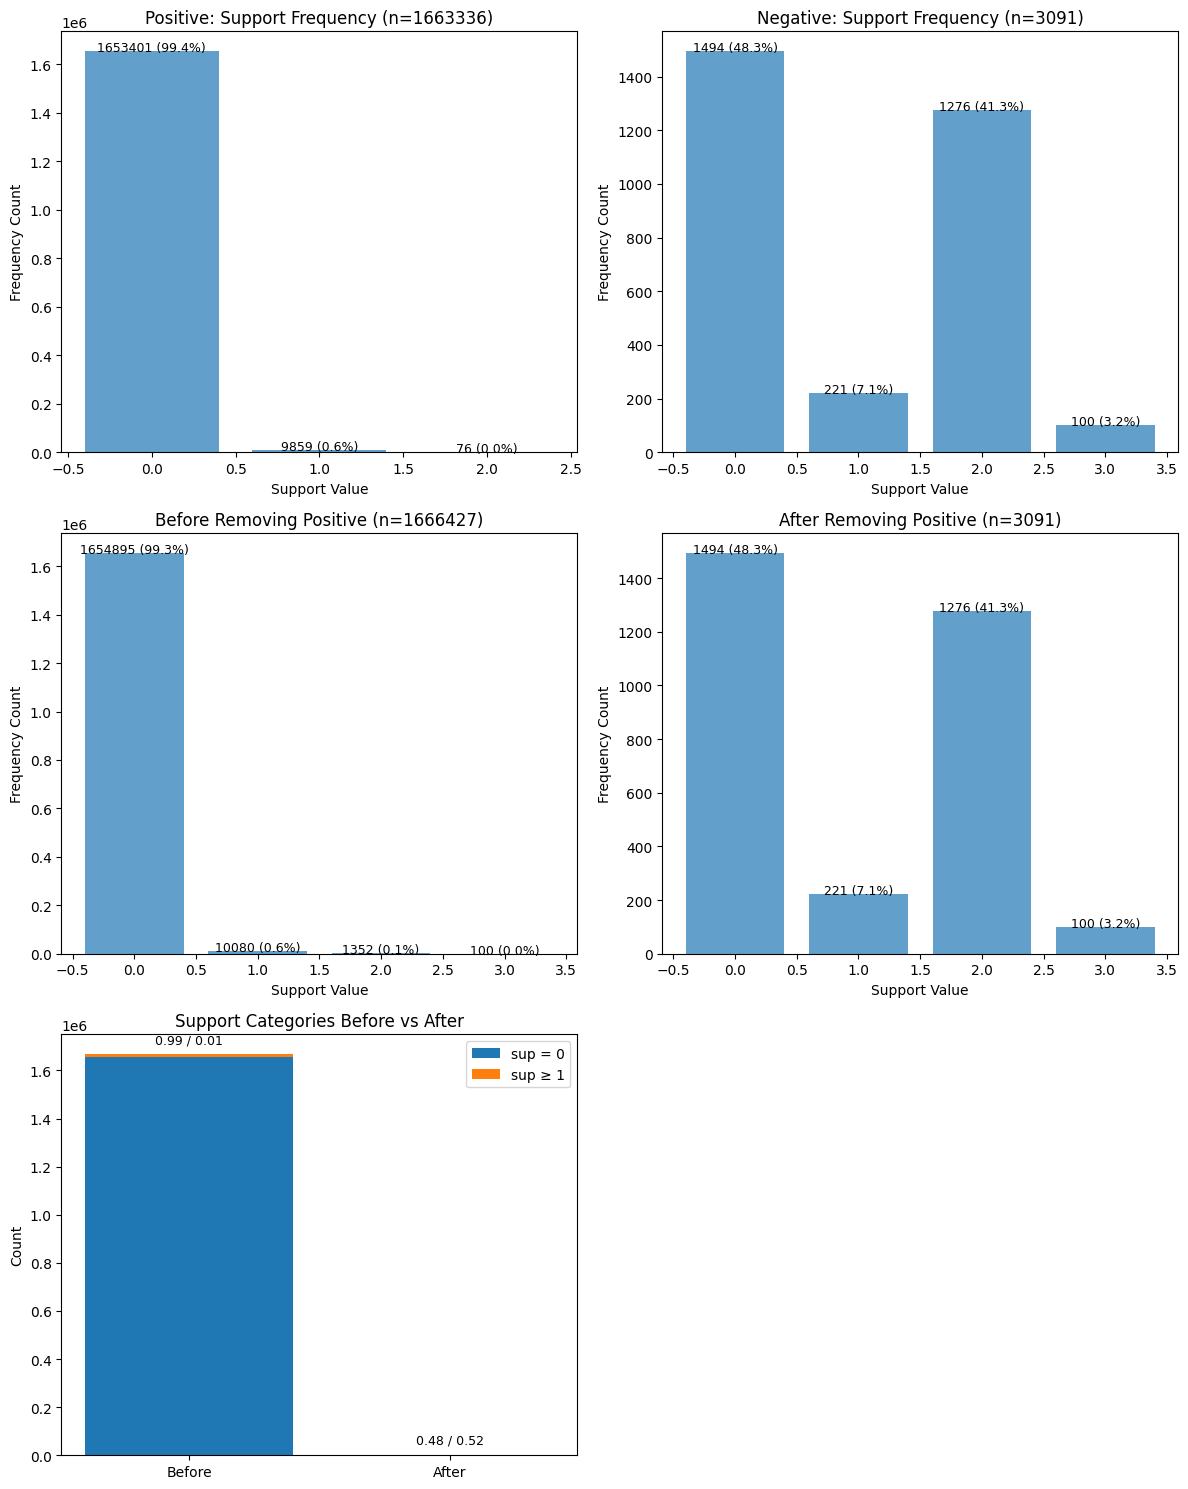

In [80]:
_ = summary_prediction_with_chimeric_sup(chcnn_p5_mk1c_predictions,  mk1c_chimeric_events)

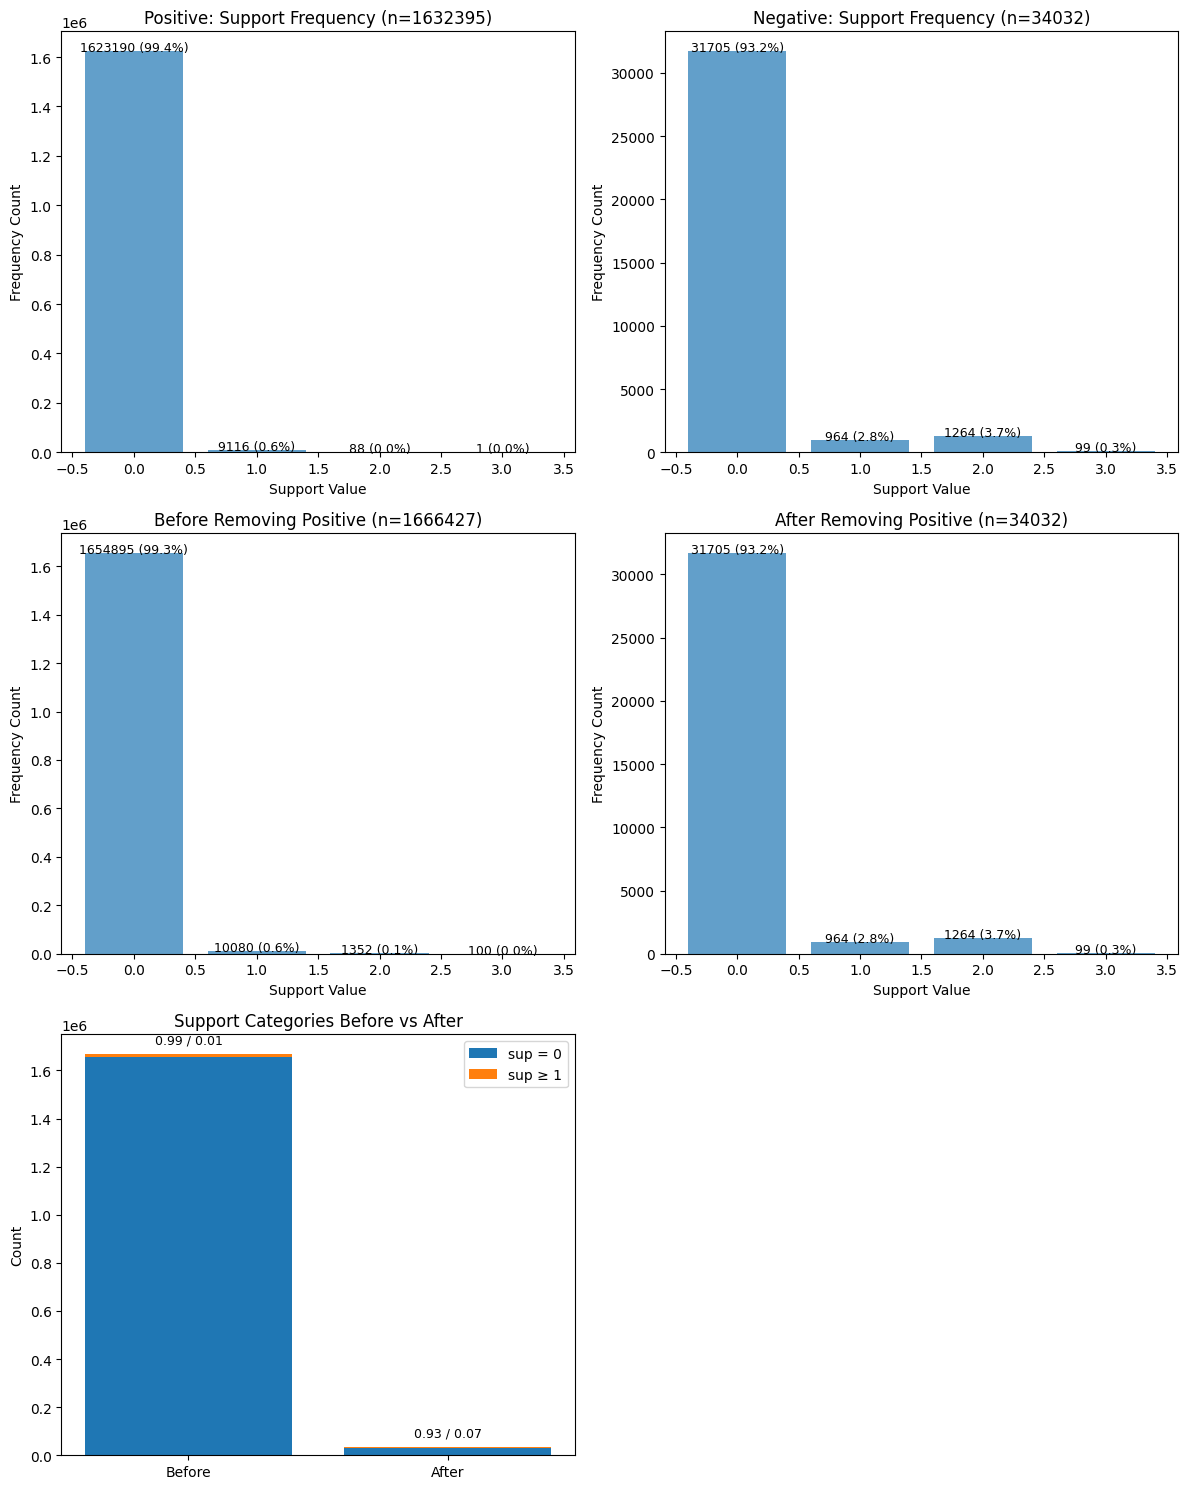

In [107]:
_ = summary_prediction_with_chimeric_sup(chcnn_p2_586360_mk1c_predictions,  mk1c_chimeric_events)

In [ ]:
_ = summary_prediction_with_chimeric_sup(chhyena_p2_586360_mk1c_predictions,  mk1c_chimeric_events)